In [487]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt

The first Tour de France started in 1903, with 110 editions as of 2023 (this notebook contains data up until 2018). As an avid cyclist, this statistic-intensive sport makes this dataset quite enjoyable to work with. I will split this analysis into multiple parts.

- **Part 1: Data Exploration:** this project contains three main datasets:
  1. Historical data: winners for each editions, the pace, distance, etc.
  2. Location data for each stage
  3. Stage-specific data
- **Part 2: Data Visualizations**
- **Part 3: Basic Statistics**
- **Part 4: Machine Learning**

# Part 1 - Data Exploration

## Dataset 1 - Historical TDF guide 

In [488]:
tour_hist_df = pd.read_csv('data/2018_historical_guide.csv')
tour_hist_df.sample(5).T

,14,22,47,10,54
Year,1921,1929,1961,1913,1968
Stages,15,22,21,15,22
Started,123,155,132,140,110
Ended,38,60,72,25,63
Distance,5485,5286,4397,5287,4492
Hour,221,186,122,197,133
Minutes,50,39,1,54,49
Seconds,26,16,33,0,32
Pace,24.724,28.319,36.033,26.715,33.556
Winner,L. Scieur,M. Dewaele,J. Anquetil,P. Thys,J. Janssen


In [489]:
print('The historical TDF dataset contains ' + str(tour_hist_df.shape[1]) + ' columns and ' + str(tour_hist_df.shape[0]) + ' rows.')

The historical TDF dataset contains 12 columns and 104 rows.


In [490]:
# check for nulls in columns
tour_hist_df.isna().sum()

Year        0
Stages      0
Started     0
Ended       0
Distance    0
Hour        0
Minutes     0
Seconds     0
Pace        0
Winner      0
Country     0
Age         0
dtype: int64

Seems like the data is clean

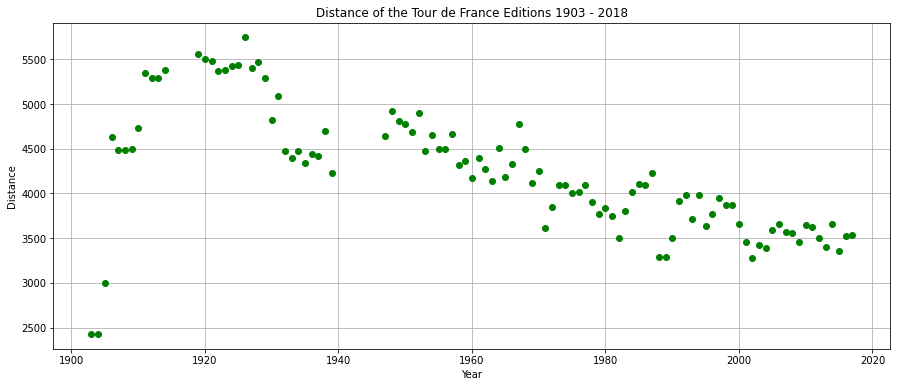

In [491]:
years = tour_hist_df['Year']
dist = tour_hist_df['Distance']

# setup
plt.figure(figsize=(15, 6))

# data
plt.plot(years, dist, marker='o', linestyle='None', color='g')

#labels
plt.title('Distance of the Tour de France Editions 1903 - 2018')
plt.xlabel('Year')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

Editions have consistently becoming shorter over time - althought it seems to have plateaued since 2020. 

#### Winner's age throughout the years at the TDF

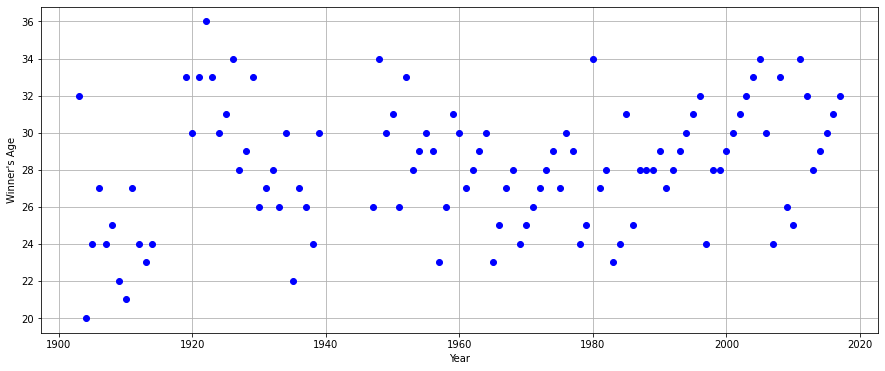

In [492]:
tdf_years = tour_hist_df['Year']
tdf_winner_age = tour_hist_df['Age']

# setup
plt.figure(figsize=(15, 6))

# data
plt.plot(tdf_years, tdf_winner_age, marker='o', linestyle='None', color='blue')

#labels
plt.xlabel('Year')
plt.ylabel("Winner's Age")
plt.grid(True)
plt.show()

#### Let's look at a distribution of ages at the TDF through history

In [493]:
unique_ages = pd.Series(tour_hist_df['Age'].unique()).sort_values()
print(unique_ages)

1     20
6     21
5     22
7     23
2     24
4     25
15    26
3     27
13    28
14    29
9     30
11    31
0     32
8     33
12    34
10    36
dtype: int64


<AxesSubplot:ylabel='Frequency'>

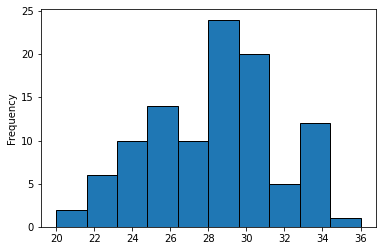

In [494]:
tour_hist_df['Age'].plot(kind='hist', edgecolor='black')

#### Some more statistics on the tour de france winner's age

In [495]:
min_age = min(tour_hist_df['Age'])
max_age = max(tour_hist_df['Age'])
mean_age = np.mean(tour_hist_df['Age'])

print("The average age is " + str(round(mean_age)) + ", while the minimum and maximum are " + str(min_age) + " and " + str(max_age) + ", respectively.")

The average age is 28, while the minimum and maximum are 20 and 36, respectively.


#### Now let's look at the countries with the most wins

Text(0, 0.5, 'Number of wins')

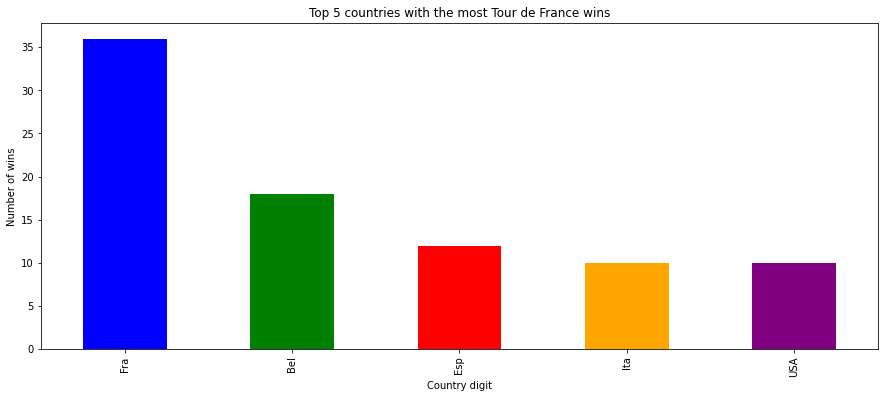

In [496]:
# get top five
top_countries = tour_hist_df['Country'].value_counts().head(5)

plt.figure(figsize=(15,6))
top_countries.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple'])

plt.title("Top 5 countries with the most Tour de France wins")
plt.xlabel("Country digit")
plt.ylabel("Number of wins")

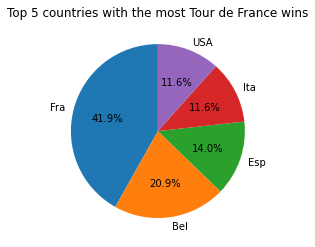

In [497]:
plt.figure(figsize=(4, 4))

plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 countries with the most Tour de France wins")
plt.show()

#### The cycling pace tends to tell a deep story, let's take compare the pace of the winner of each stage.

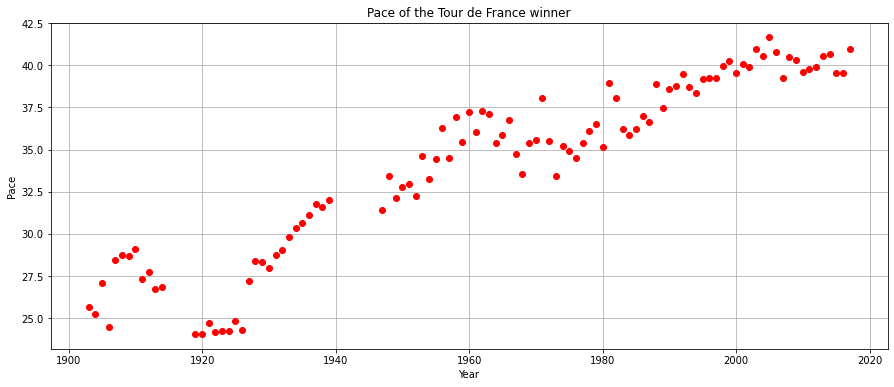

In [498]:
tdf_years = tour_hist_df['Year']
tdf_pace = tour_hist_df['Pace']

# setup
plt.figure(figsize=(15, 6))

# data
plt.plot(tdf_years, tdf_pace, marker='o', linestyle='None', color='red')

#labels
plt.title('Pace of the Tour de France winner')
plt.xlabel('Year')
plt.ylabel('Pace')
plt.grid(True)
plt.show()

#### Now looking at pace vs distance of the stages over time

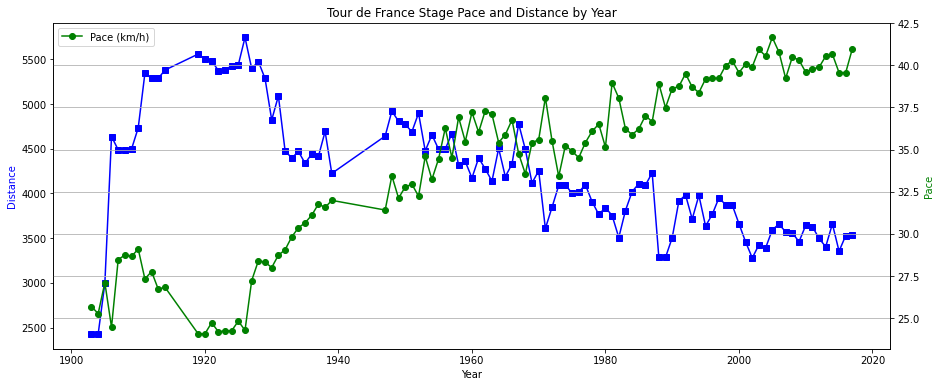

In [499]:
temp_data = tour_hist_df.groupby('Year').agg({'Pace': 'mean', 'Distance': 'sum'}).reset_index()
temp_data.head()

fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()
ax1.plot(temp_data['Year'], temp_data['Distance'], 'b', marker='s', label='Distance (km)')
ax2.plot(temp_data['Year'], temp_data['Pace'], 'g', marker='o', label='Pace (km/h)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Distance', color='b')

ax2.set_ylabel('Pace', color='g')
plt.title('Tour de France Stage Pace and Distance by Year')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

#### The fastest rider in the Tour de France history is...

In [500]:
fastest_rider = tour_hist_df[tour_hist_df['Pace'] == tour_hist_df['Pace'].min()]
print(fastest_rider)

    Year  Stages  Started  Ended  Distance  Hour  Minutes  Seconds    Pace  \
12  1919      15       69     11      5560   231        7       15  24.056   

       Winner Country  Age  
12  F. Lambot     Bel   33  


#### Let's look at the 5 top fastest riders

In [501]:
tour_hist_df.sort_values(by='Pace', inplace=True)
top_5 = tour_hist_df.head(5)
print(top_5[['Winner', 'Pace', 'Age']])

           Winner    Pace  Age
12      F. Lambot  24.056   33
13        P. Thys  24.072   30
15      F. Lambot  24.196   36
16   H. Pélissier  24.233   33
17  O. Bottecchia  24.250   30


#### And youngest winners

In [502]:
top_5_under_23 = tour_hist_df[tour_hist_df['Age'] < 23]
print(top_5_under_23[['Age', 'Winner', 'Year']])

    Age     Winner  Year
1    20  H. Cornet  1904
6    22   F. Faber  1909
7    21  O. Lapize  1910
28   22    R. Maes  1935


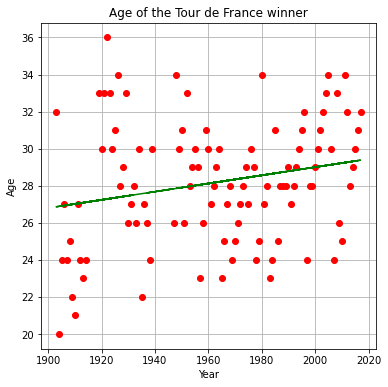

In [503]:
tdf_years = tour_hist_df['Year']
winner_age = tour_hist_df['Age']

# setup
plt.figure(figsize=(6, 6))

# data
plt.plot(tdf_years, winner_age, marker='o', linestyle='None', color='red')

# trendline
m, b = np.polyfit(tdf_years, winner_age, 1)
trendline = m * tdf_years + b
plt.plot(tdf_years, trendline, label='Trendline', color='g')

#labels
plt.title('Age of the Tour de France winner')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()

#### Conclusion
It is clear that the data is a all over the place, the fact is that the only 4 winners under 23 yo of the Tour occurred in the first 30 years of the tournament. These are the ages of the last 5 winners (none is included in this dataset).

- 2019 Egan Bernal 22 yo
- 2020 Tadej Pogačar 21 yo
- 2021 Tadej Pogačar 22 yo
- 2022 Jonas Vingegaard 25 yo
- 2023 Jonas Vingegaard 26 yo

Egan Bernal won the Tour in 2019, becoming the youngest ever since 1930 and Tadej Pogačar won consecutive editions. It seems that after 90 years, younger riders are thriving once again.

## Dataset 2 - TDF Stage Geo Data

In [504]:
geo_stages_df = pd.read_csv('data/unique_stage_geocode.csv')
geo_stages_df.sample(5).T

,192,85,585,145,681
Index,193,86,586,146,682
City,Fromentine,Foug�res,Malo-les-Bains,Bourg-Saint-Maurice,Thionville
lon,"-2,140027","-1,204626","2,401069","6,769548","6,168426"
lat,"46,889175","48,3515609","51,48679","45,618598","49,357571"


In [505]:
geo_stages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   756 non-null    int64 
 1   City    756 non-null    object
 2   lon     756 non-null    object
 3   lat     756 non-null    object
dtypes: int64(1), object(3)
memory usage: 23.8+ KB


## Dataset 3 - TDF Stages

In [506]:
stages_df = pd.read_csv('data/stages_TDF.csv')
stages_df.sample(5).T

,904,1716,1790,959,473
Stage,15b,17b,14,17,8
Date,7/17/1977,7/22/1937,7/18/1934,7/15/1975,7/9/1995
Distance,14.0,37.0,177.0,225.0,54.0
Origin,Morzine,Royan,Montpellier,Valloire,Huy
Destination,Avoriaz,Saintes,Perpignan,Morzine Avoriaz,Seraing
Type,Individual time trial,Plain stage,Plain stage,Stage with mountain(s),Individual time trial
Winner,Lucien Van Impe,Adolph Braeckeveldt Heinz Wengler,Roger Lapébie,Vicente Lopez-Carril,Miguel Indurain
Winner_Country,BEL,"c(""BEL"", ""GER"")",FRA,ESP,ESP


In [507]:
count_stage_types = stages_df['Type'].nunique()
print("There are " + str(count_stage_types) + " different types of stages. This is the distribution")

There are 18 different types of stages. This is the distribution


In [508]:
type_sort = stages_df['Type'].sort_values(ascending=True)

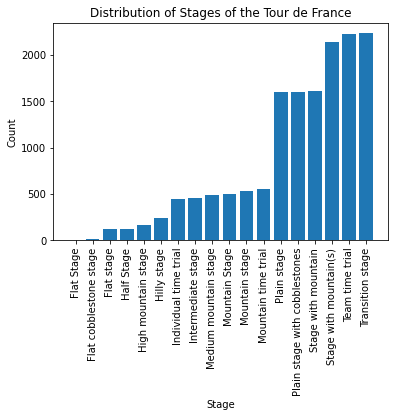

In [509]:
plt.bar(type_sort.values, stages_df['Type'].index)

# Label the axes
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Distribution of Stages of the Tour de France')
plt.xticks(rotation=90)

# Display the histogram
plt.show()

In [510]:
subset = stages_df[['Type', 'Winner_Country']]
gbr_wins = subset[subset['Winner_Country'] == 'GBR']

grouped = gbr_wins.groupby('Type').size().reset_index(name='Stage_Wins')

In [511]:
stages_df.head(4)
grouped = stages_df.groupby('Type').size().reset_index(name='Count')

In [512]:
all_countries = stages_df.groupby(['Type', 'Winner_Country']).size().reset_index(name='Count')
all_countries.head()

,Type,Winner_Country,Count
0,Flat Stage,BEL,4
1,Flat Stage,FRA,2
2,Flat Stage,ITA,2
3,Flat Stage,NED,1
4,Flat cobblestone stage,NED,1


In [526]:
total_wins = all_countries.groupby('Winner_Country')['Count'].sum()
total_wins_df = pd.DataFrame({'Total_Wins': total_wins})
merged = pd.merge(all_countries, total_wins_df, left_on='Winner_Country', right_on='Winner_Country', how='left')

In [528]:
merged.head(50)

,Type,Winner_Country,Count,Total_Wins
0,Flat Stage,BEL,4,460
1,Flat Stage,FRA,2,691
2,Flat Stage,ITA,2,262
3,Flat Stage,NED,1,157
4,Flat cobblestone stage,NED,1,157
5,Flat cobblestone stage,NOR,1,17
6,Flat stage,AUS,5,29
7,Flat stage,BEL,2,460
8,Flat stage,CZE,1,3
9,Flat stage,DEN,1,18


In [514]:
usa = merged[merged['Winner_Country'] == 'USA']
print(usa['Count'].sum())

38


In [515]:
print(usa)

                       Type Winner_Country  Count  Total_Wins
21               Flat stage            USA      1          38
76    Individual time trial            USA     16          38
107          Mountain stage            USA      4          38
147             Plain stage            USA      5          38
176  Stage with mountain(s)            USA     10          38
180         Team time trial            USA      2          38


#### Let's look at the top individual country stage statistics: GBR, USA, FRA, BEL, ESP, ITA

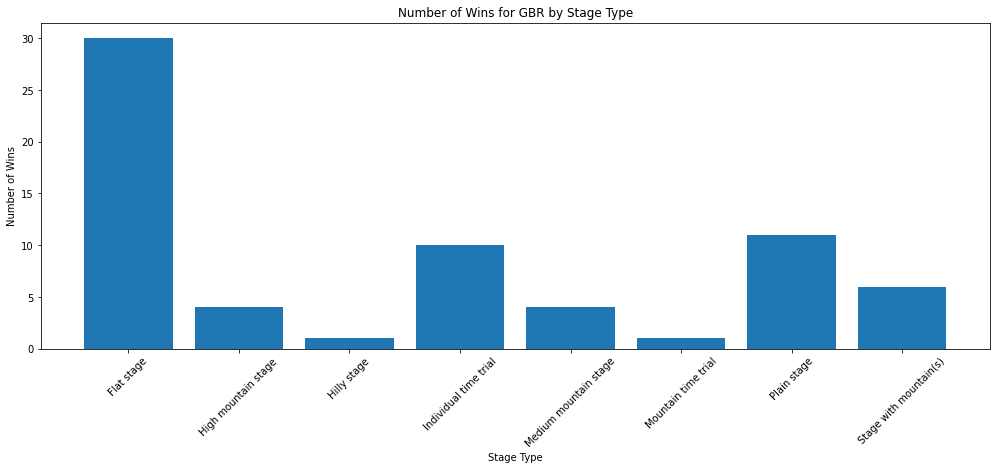

In [516]:
df = merged[merged['Winner_Country'] == 'GBR']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

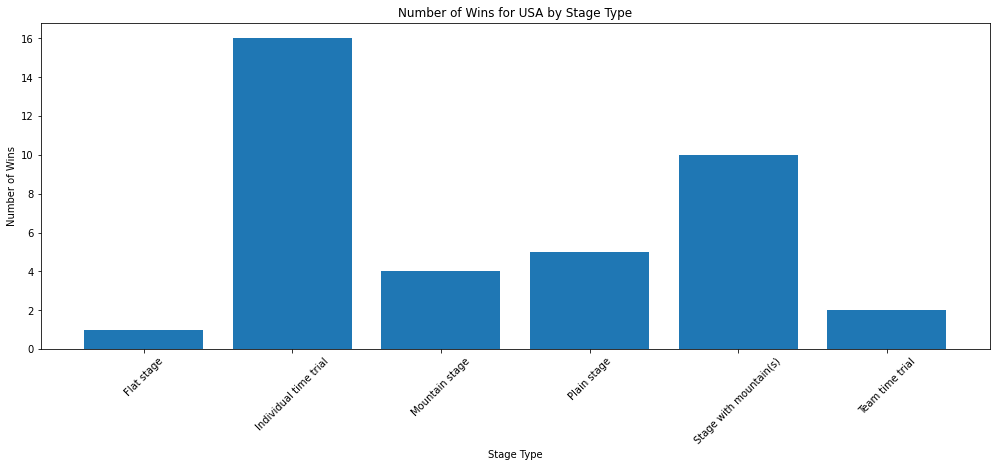

In [517]:
df = merged[merged['Winner_Country'] == 'USA']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

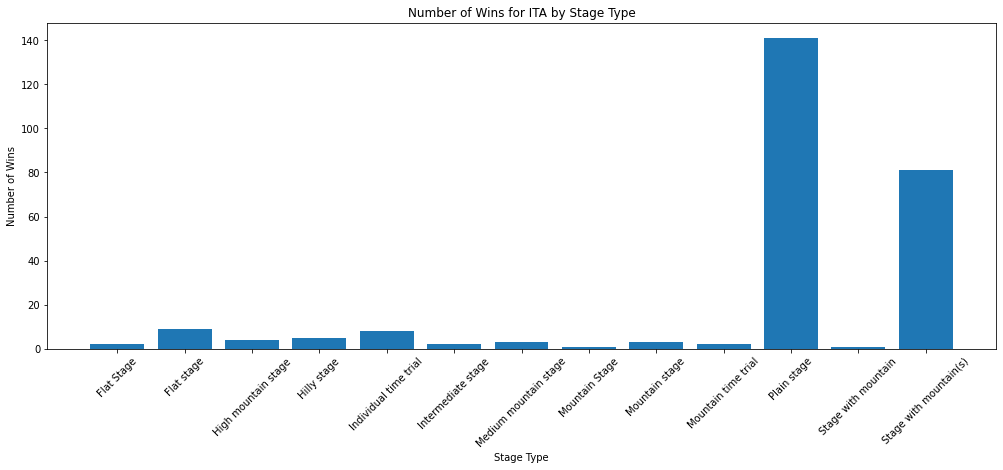

In [518]:
df = merged[merged['Winner_Country'] == 'ITA']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

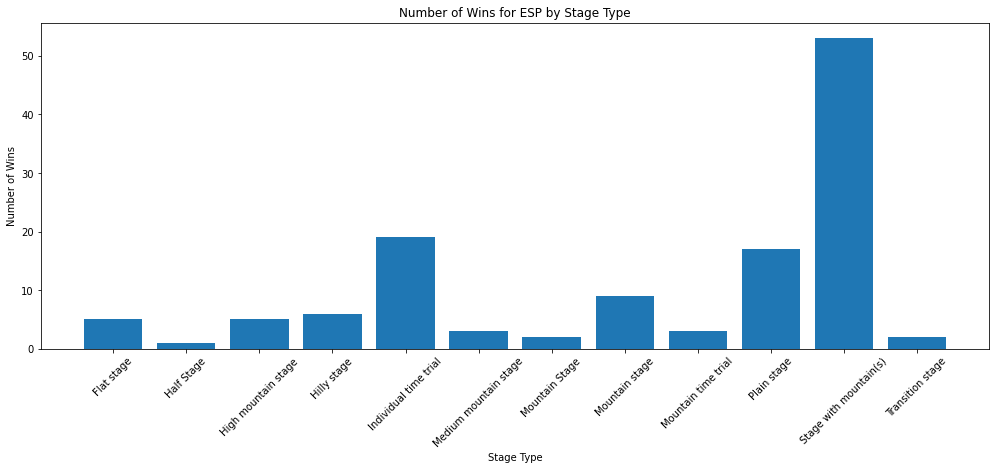

In [519]:
df = merged[merged['Winner_Country'] == 'ESP']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

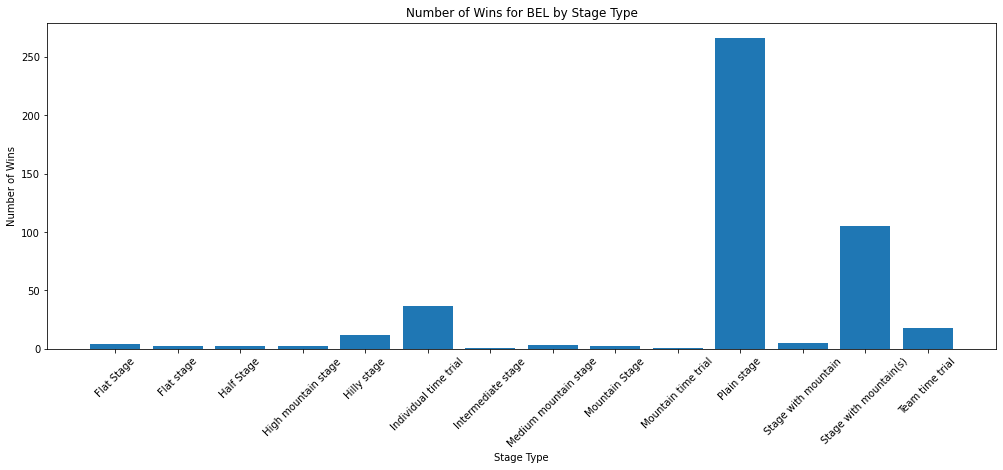

In [520]:
df = merged[merged['Winner_Country'] == 'BEL']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

And finally, the hosts...

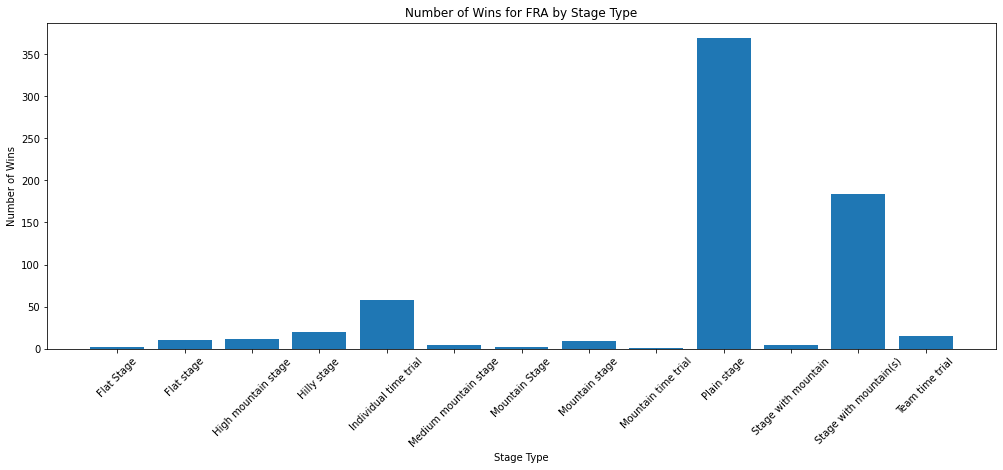

In [521]:
df = merged[merged['Winner_Country'] == 'FRA']

country = df['Winner_Country'].unique()[0]

plt.figure(figsize=(17, 6))
plt.bar(df['Type'], df['Count'])
plt.ylabel('Number of Wins')
plt.xlabel('Stage Type')

title = 'Number of Wins for {} by Stage Type'.format(country)
plt.title(title)
plt.xticks(rotation=45)
plt.show()

Interesting the similitude between Belgium's and France's results over tiem.

Let's get the 

#### Let's now explore the best countries at the top three stage types: Mountain, Flat, Individual Time Trial.

Mountan Stages

In [529]:
mtn_stage = all_countries[all_countries['Type'] == 'Mountain Stage']
mtn_stage = mtn_stage.drop(columns =['Type'])
mtn_stage

,Winner_Country,Count
90,BEL,2
91,ESP,2
92,FRA,2
93,ITA,1
94,LUX,1
95,NED,3


In [525]:
mtn_stage.sort_values(by='Count', ascending = False)
mtn_stage.head(5)

,Winner_Country,Count
90,BEL,2
91,ESP,2
92,FRA,2
93,ITA,1
94,LUX,1


#### Most Mountain Stage wins: BELGIUM

In [524]:
flat = all_countries[all_countries['Type'] == 'Flat Stage']
flat = flat.drop(columns =['Count', 'Type'])
flat.sort_values(by='Total_Wins', ascending = False)
flat.head(5)

KeyError: 'Total_Wins'